In [19]:
import numpy as np
import pandas as pd
from root_numpy import tree2array
import ROOT as R
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler  
from numpy import concatenate

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from math import *

In [22]:
f = R.TFile("data/BlueLaser_2017_rereco_v2_newformat.root.filter.6.131.0.public.root")
t = f.Get("laser")
datatree = tree2array(t)
df = pd.DataFrame(datatree, columns=["transparency","time", "lumi","time_in_fill"])

In [23]:
df.time.min()

1495549357

In [24]:
df.time = np.log(1 + df.time -df.time.min())
data = df.values

In [5]:
data

array([[9.44678009e-01, 0.00000000e+00, 1.80000000e+01, 5.83000000e+03],
       [9.43732023e-01, 7.27931884e+00, 1.80000000e+01, 7.27900000e+03],
       [9.44612980e-01, 7.79770204e+00, 1.80000000e+01, 8.26400000e+03],
       ...,
       [9.07657981e-01, 1.65963239e+01, 1.05610000e+04, 2.89030000e+04],
       [9.07836020e-01, 1.65964905e+01, 1.05610000e+04, 3.15920000e+04],
       [9.07652974e-01, 1.65966570e+01, 1.05610000e+04, 3.42780000e+04]])

In [25]:
data_shaped= np.reshape(data[:3104,:], (-1, 8, 4))
print(data_shaped.shape)
X = data_shaped[:, :, 1:]
Y = data_shaped[:, :, 0]   # last value of the sequence of transparencies over the 8 consecutive samples

(388, 8, 4)


Fighetterie per rinormalizzare input e output #fixme

In [ ]:
#scalerX = MinMaxScaler(feature_range=(0,1))
#scalerY = MinMaxScaler(feature_range=(0,1))

#Xs = scalerX.fit_transform(X)
#Ys = scalerY.fit_transform(Y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, random_state=42)

Using a model that returns 8 numbers, the trasparency of the sequence of samples.


Already tested mae: bad convergence. 

In [92]:
# design network
timestemps = X_train.shape[1]
data_dim = X_train.shape[2]
model = Sequential()
model.add(LSTM(10, return_sequences=True,  input_shape=(timestemps, data_dim)))
model.add(LSTM(10))
model.add(Dense(8))
model.compile(loss='mse', optimizer='adam')

In [93]:
model.summary()
history = model.fit(X, Y, epochs=500, batch_size=200, verbose=2, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 8, 10)             560       
_________________________________________________________________
lstm_50 (LSTM)               (None, 8, 1)              48        
_________________________________________________________________
flatten_4 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 72        
Total params: 680
Trainable params: 680
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
 - 4s - loss: 0.8343
Epoch 2/500
 - 0s - loss: 0.8275
Epoch 3/500
 - 0s - loss: 0.8200
Epoch 4/500
 - 0s - loss: 0.8121
Epoch 5/500
 - 0s - loss: 0.8038
Epoch 6/500
 - 0s - loss: 0.7968
Epoch 7/500
 - 0s - loss: 0.7905
Epoch 8/500
 - 0s - loss: 0.7837
Epoch 9/500


Epoch 214/500
 - 0s - loss: 0.0032
Epoch 215/500
 - 0s - loss: 0.0031
Epoch 216/500
 - 0s - loss: 0.0031
Epoch 217/500
 - 0s - loss: 0.0031
Epoch 218/500
 - 0s - loss: 0.0031
Epoch 219/500
 - 0s - loss: 0.0031
Epoch 220/500
 - 0s - loss: 0.0030
Epoch 221/500
 - 0s - loss: 0.0030
Epoch 222/500
 - 0s - loss: 0.0030
Epoch 223/500
 - 0s - loss: 0.0030
Epoch 224/500
 - 0s - loss: 0.0030
Epoch 225/500
 - 0s - loss: 0.0030
Epoch 226/500
 - 0s - loss: 0.0029
Epoch 227/500
 - 0s - loss: 0.0029
Epoch 228/500
 - 0s - loss: 0.0029
Epoch 229/500
 - 0s - loss: 0.0029
Epoch 230/500
 - 0s - loss: 0.0029
Epoch 231/500
 - 0s - loss: 0.0029
Epoch 232/500
 - 0s - loss: 0.0028
Epoch 233/500
 - 0s - loss: 0.0028
Epoch 234/500
 - 0s - loss: 0.0028
Epoch 235/500
 - 0s - loss: 0.0028
Epoch 236/500
 - 0s - loss: 0.0028
Epoch 237/500
 - 0s - loss: 0.0028
Epoch 238/500
 - 0s - loss: 0.0028
Epoch 239/500
 - 0s - loss: 0.0027
Epoch 240/500
 - 0s - loss: 0.0027
Epoch 241/500
 - 0s - loss: 0.0027
Epoch 242/500
 - 0s 

 - 0s - loss: 0.0016
Epoch 449/500
 - 0s - loss: 0.0016
Epoch 450/500
 - 0s - loss: 0.0016
Epoch 451/500
 - 0s - loss: 0.0016
Epoch 452/500
 - 0s - loss: 0.0016
Epoch 453/500
 - 0s - loss: 0.0016
Epoch 454/500
 - 0s - loss: 0.0016
Epoch 455/500
 - 0s - loss: 0.0016
Epoch 456/500
 - 0s - loss: 0.0016
Epoch 457/500
 - 0s - loss: 0.0016
Epoch 458/500
 - 0s - loss: 0.0016
Epoch 459/500
 - 0s - loss: 0.0016
Epoch 460/500
 - 0s - loss: 0.0016
Epoch 461/500
 - 0s - loss: 0.0016
Epoch 462/500
 - 0s - loss: 0.0016
Epoch 463/500
 - 0s - loss: 0.0016
Epoch 464/500
 - 0s - loss: 0.0016
Epoch 465/500
 - 0s - loss: 0.0016
Epoch 466/500
 - 0s - loss: 0.0016
Epoch 467/500
 - 0s - loss: 0.0016
Epoch 468/500
 - 0s - loss: 0.0016
Epoch 469/500
 - 0s - loss: 0.0016
Epoch 470/500
 - 0s - loss: 0.0015
Epoch 471/500
 - 0s - loss: 0.0015
Epoch 472/500
 - 0s - loss: 0.0015
Epoch 473/500
 - 0s - loss: 0.0015
Epoch 474/500
 - 0s - loss: 0.0015
Epoch 475/500
 - 0s - loss: 0.0015
Epoch 476/500
 - 0s - loss: 0.0015

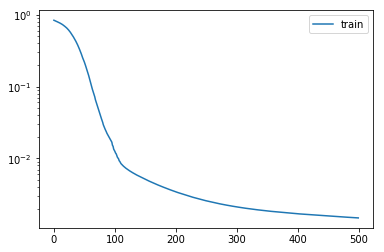

In [94]:
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.yscale("log")
plt.show()

In [95]:
Y_predict = model.predict(X_train)

In [96]:
# calculate RMSE
rmse = sqrt(mean_squared_error(y_train, Y_predict))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.039


## More previous samples

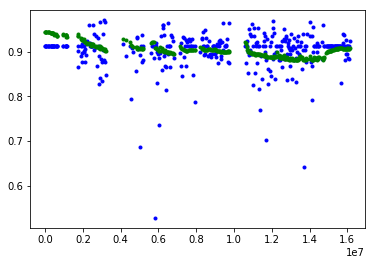

In [97]:
plt.plot(np.exp(X_train[:,-1,0]),Y_predict[:,-1],"b.")
plt.plot(np.exp(X_train[:,-1,0]),y_train[:,-1],"g.")
plt.show()

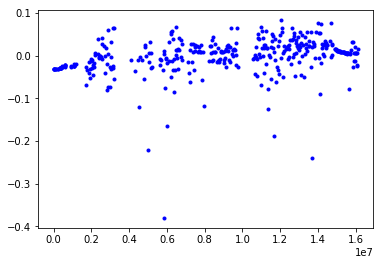

In [98]:
plt.plot(np.exp(X_train[:,-1,0]),Y_predict[:,-1]- y_train[:,-1],"b.")
plt.show()

In [99]:
a = np.exp(X_train[:,-1,0])
mask = (a>2e6) & (a < 3e6)

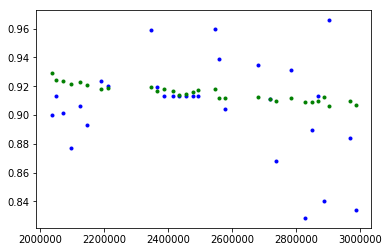

In [100]:
plt.plot(np.exp(X_train[:,-1,0])[mask],Y_predict[mask,-1],"b.")
plt.plot(np.exp(X_train[:,-1,0])[mask],y_train[mask,-1],"g.")
plt.show()